Importing Libraries


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

Load the Dataset

In [3]:
data=pd.read_csv("cardata.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking for NULL Values





In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Correlation Matrix

In [7]:
col=data[['Year','Selling_Price','Present_Price','Kms_Driven','Owner']]
correlation_matrix=col.corr()
print(correlation_matrix)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


create a heatmap of correlation matrix

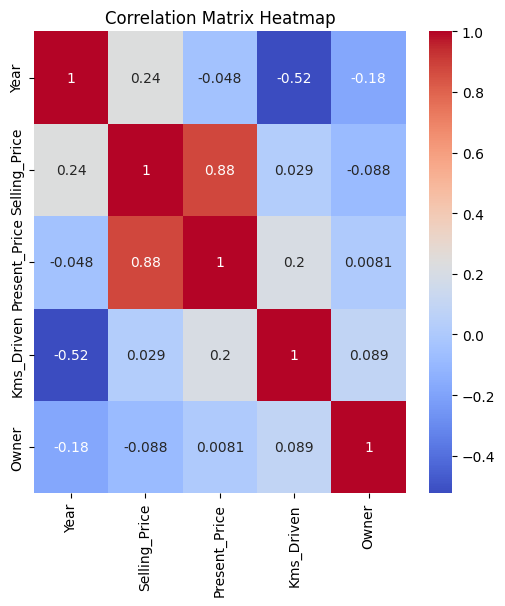

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix Heatmap")
plt.show()

Top Cars

In [9]:
top_cars=data['Car_Name'].value_counts().head(10)
print(top_cars)

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64


Top 10 companies with their cars

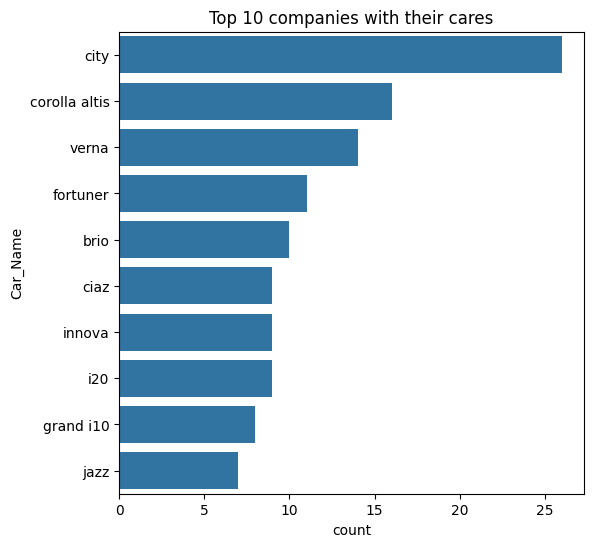

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(y=data['Car_Name'], order=top_cars.index)
plt.title("Top 10 companies with their cares")
plt.show()

In [11]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

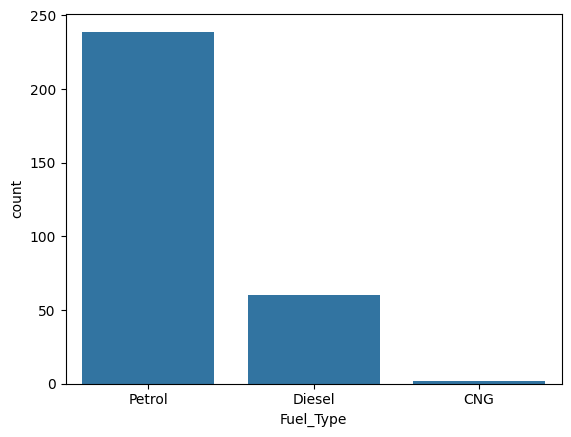

In [12]:
sns.countplot(x=data['Fuel_Type'])

In [13]:
data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

<Axes: xlabel='Seller_Type', ylabel='count'>

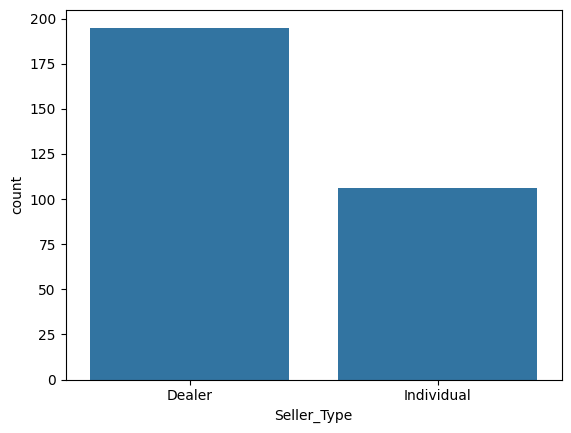

In [14]:
sns.countplot(x=data['Seller_Type'])

In [15]:
data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

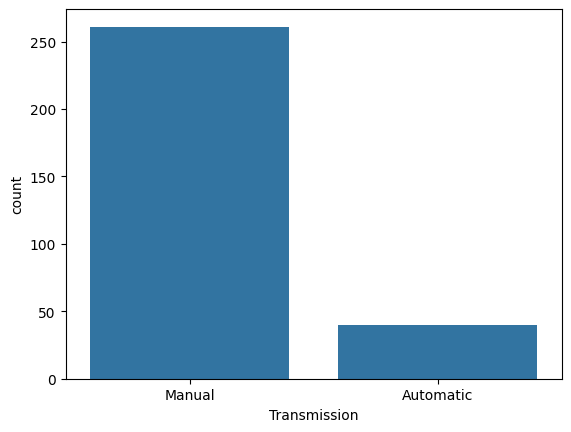

In [16]:
sns.countplot(x=data['Transmission'])

<Axes: xlabel='Selling_Price'>

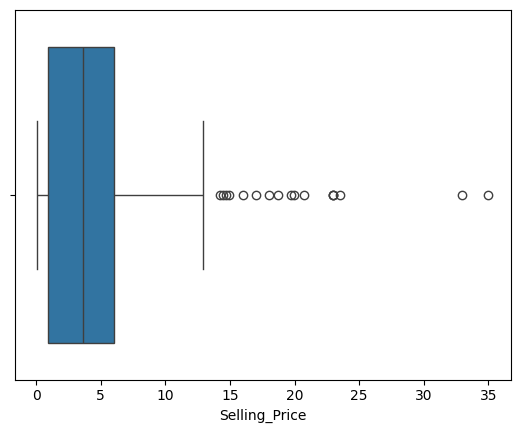

In [17]:
sns.boxplot(x=data['Selling_Price'])

How old the car is?

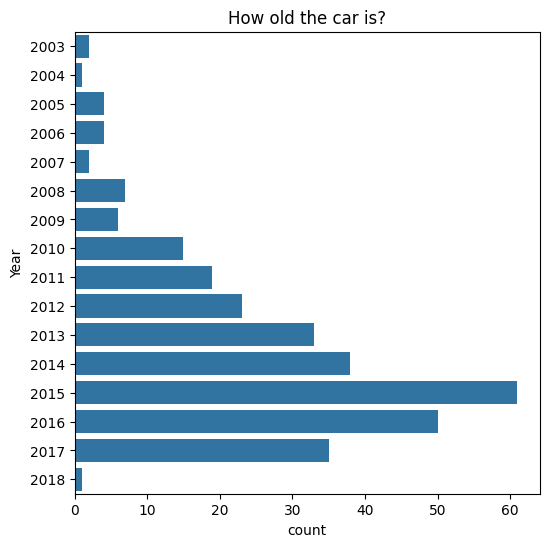

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(y=data['Year'])
plt.title("How old the car is?")
plt.show()

Most of the cars from 2015

<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

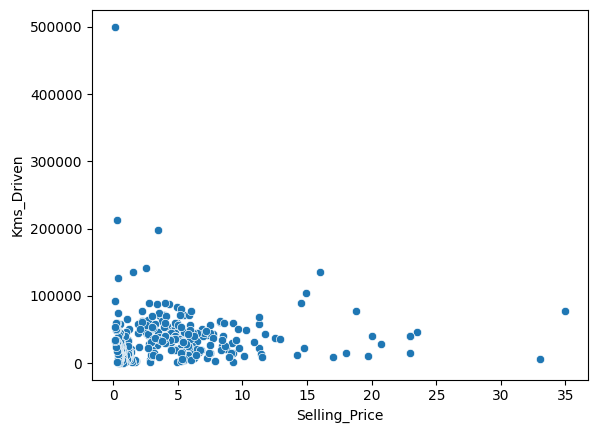

In [19]:
sns.scatterplot(x=data['Selling_Price'],y=data['Kms_Driven'])

Getting non_numeric columns

In [20]:
data.select_dtypes(include=['object']).columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [21]:
label_encoder = LabelEncoder()

Convert categorical columns into numerical columns using LabelEncoder

In [26]:
data['Car_Name'] = label_encoder.fit_transform(data['Car_Name'])
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Seller_Type'] = label_encoder.fit_transform(data['Seller_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


Split data into training & testing data

In [27]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=35)

In [29]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

Linear Regression

In [36]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaler, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaler)



Model Evaluation

In [37]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print('Mean Squared Error:',linear_reg_mse)
print('R-squared:', linear_reg_r2)

Mean Squared Error: 6.496077643265625
R-squared: 0.769299862197152
